In [100]:
import numpy as np 
import matplotlib.pyplot as plt
from linear import LinearRegression,Ridge,PolynomialFeatures,PolynomialRegression, Lasso, Lasso2
from sklearn.linear_model import Lasso as sk_Lasso
np.random.seed(10)

In [101]:
X=np.random.random((10,1))
y = 3*X + np.random.random(X.shape) + 3

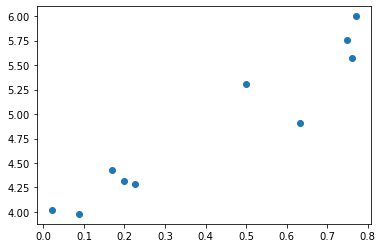

In [102]:
plt.scatter(X,y)

In [103]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X,y)
y_pred = lr.predict(X)

In [104]:
x = np.linspace(X.min()-0.1,X.max()+0.1).reshape(-1,1)

In [105]:
x.shape

(50, 1)

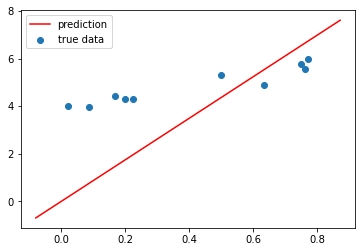

In [106]:
plt.scatter(X, y, label = "true data")
plt.plot(x, lr.predict(x), label = "prediction", c='r')
plt.legend()

In [107]:
ri = Ridge()
ri.fit(X,y)
y_pred = ri.predict(X)

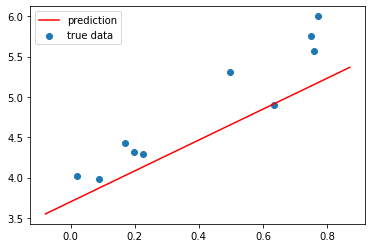

In [108]:
plt.scatter(X, y, label = "true data")
plt.plot(x, ri.predict(x), label = "prediction", c='r')
plt.legend()

In [109]:
lr = sk_Lasso()
lr.fit(X,y)
y_pred = lr.predict(X)

In [110]:
y_pred

array([4.85676398, 4.85676398, 4.85676398, 4.85676398, 4.85676398,
       4.85676398, 4.85676398, 4.85676398, 4.85676398, 4.85676398])

In [111]:
lr.coef_

array([0.])

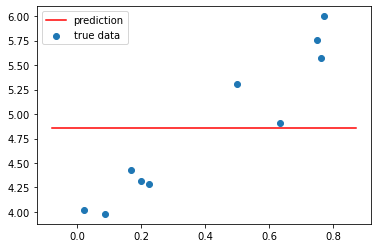

In [112]:
plt.scatter(X, y, label = "true data")
plt.plot(x, lr.predict(x), label = "prediction", c='r')
plt.legend()

In [113]:
# ri = Lasso()
# ri.fit(X,y)
# y_pred = ri.predict(X)

In [114]:
# plt.scatter(X, y, label = "true data")
# plt.plot(x, ri.predict(x), label = "prediction", c='r')
# plt.legend()

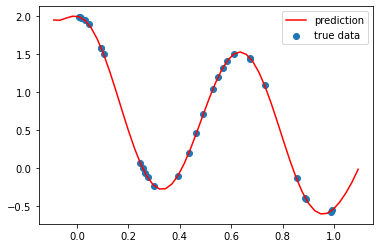

In [461]:
X = np.random.random(30)
eps = np.random.uniform(len(X))
y = np.sin(X*10 + eps) + np.exp(-X)
pl = PolynomialRegression(Ridge(lambda_=1e-10, fit_intercept=False) ,degree=10)
pl.fit(X,y)
y_pred = pl.predict(X)
plt.scatter(X, y, label = "true data")
x = np.linspace(X.min()-0.1, X.max()+0.1)
#x = np.linspace(X.min()-0.3, X.max()+0.3)
plt.plot(x, pl.predict(x), label = "prediction", c='r')
plt.legend()

## wine quality 

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
data = datasets.load_wine()

In [18]:
X = data['data']
y = data['target']

In [19]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train,y_train)

In [24]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [25]:
train_mse = mean_squared_error(y_pred_train, y_train)
test_mse = mean_squared_error(y_pred_test, y_test)
print("train MSE : {:.4}".format(train_mse))
print("test MSE : {:.4}".format(test_mse))

train MSE : 0.05587
test MSE : 0.09091


In [26]:
for lambda_ in [1., 0.1, 0.01]:
    model = Lasso(lambda_=lambda_)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_pred_train, y_train)
    test_mse = mean_squared_error(y_pred_test, y_test)
    print('-'*3, "lambda = {}".format(lambda_), '-'*3)
    print("train MSE : {:.4}".format(train_mse))
    print("test MSE : {:.4}".format(test_mse))
    print('coef')
    print(model.w_)        

--- lambda = 1.0 ---
train MSE : 0.6006
test MSE : 0.5915
coef
[ 0.96992481 -0.          0.         -0.          0.         -0.
 -0.         -0.          0.         -0.          0.         -0.
 -0.         -0.        ]
--- lambda = 0.1 ---
train MSE : 0.4543
test MSE : 0.4398
coef
[ 0.30058952 -0.          0.         -0.          0.         -0.
 -0.         -0.00953392  2.02339769 -0.          0.         -0.0578011
 -0.         -0.        ]
--- lambda = 0.01 ---
train MSE : 0.1359
test MSE : 0.1841
coef
[ 2.61803833e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -5.68514496e-01
  8.18894237e-02  0.00000000e+00  0.00000000e+00 -5.78654319e-01
 -8.56403601e-04 -0.00000000e+00]


## Bias and Variance 

真の関数を以下のように設定する
$$
f(x) = \frac{1}{1 + x} \ \ \ (0\le x\le 5)
$$
この時にバイアスを近似的に計算するプログラムを書く

In [28]:
def f(x):
    return 1/(1+x)

In [29]:
def sample(n):
    x = np.random.random(n) * 5
    y = f(x)
    return x, y 

In [30]:
xs = np.linspace(0,5,500)
n=10000

y_pr_sum = np.zeros(len(xs))
y_lr_sum = np.zeros(len(xs))

for _ in range(n):
    x, y = sample(5)
    pr = PolynomialRegression(degree=4)
    lr = LinearRegression()
    pr.fit(x,y)
    lr.fit(x,y)
    y_pr = pr.predict(xs)
    y_lr = lr.predict(xs)
    
    y_pr_sum += y_pr
    y_lr_sum += y_lr       
    
E_y_pr = y_pr_sum/n
E_y_lr = y_lr_sum/n

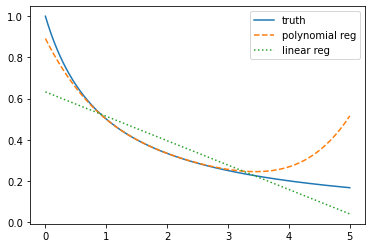

In [31]:
plt.plot(xs, f(xs), label = 'truth')
plt.plot(xs, E_y_pr, linestyle = "dashed" ,label = 'polynomial reg')
plt.plot(xs, E_y_lr, linestyle = "dotted", label = 'linear reg')
plt.legend()

次にバリアンスについても近似的に計算してバイアス・バリアンスを可視化する

In [32]:
y_true = f(xs)

# 合計値
y_pr_sum = np.zeros(len(xs))
y_lr_sum = np.zeros(len(xs))

# f(x)との二乗誤差
y_pr_se = np.zeros(len(xs))
y_lr_se = np.zeros(len(xs))

for _ in range(n):
    x, y = sample(5)    
    pr = PolynomialRegression(degree=4)
    lr = LinearRegression()
    pr.fit(x,y)
    lr.fit(x,y)
    y_pr = pr.predict(xs)
    y_lr = lr.predict(xs)
    
    y_pr_sum += y_pr
    y_lr_sum += y_lr
    y_pr_se += (y_true - y_pr)**2
    y_lr_se += (y_true - y_lr)**2
    
bi_y_pr = (y_true - y_pr_sum/n)**2
bi_y_lr = (y_true - y_lr_sum/n)**2
var_y_pr = y_pr_se / n
var_y_lr = y_lr_se / n

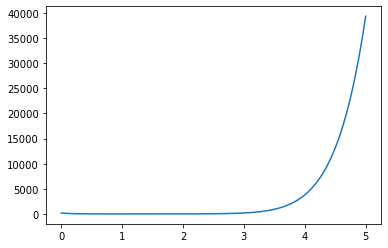

In [33]:
plt.plot(xs, y_pr_se)

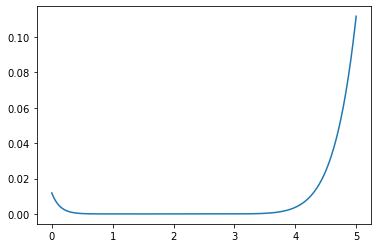

In [34]:
plt.plot(xs, bi_y_pr)

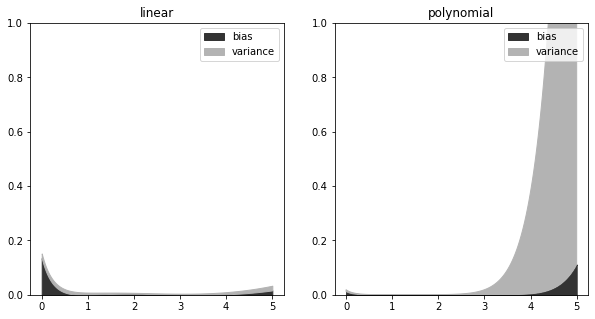

In [35]:
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("linear")
ax2.set_title("polynomial")
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)

ax1.fill_between(xs, 0, bi_y_lr, color="0.2",label = "bias")
ax1.fill_between(xs, bi_y_lr, var_y_lr, color = "0.7",label = "variance")
ax1.legend()
ax2.fill_between(xs, 0, bi_y_pr, color="0.2",label = "bias")
ax2.fill_between(xs, bi_y_pr, var_y_pr, color="0.7",label = "variance")
ax2.legend()

In [90]:
a = [[0,0,0],[0,0,0]]

In [91]:
a

[[0, 0, 0], [0, 0, 0]]

In [92]:
b[:][:] = a[:][:][:]

In [93]:
b[0][0] = 200

In [94]:
b

[[200, 0, 0], [0, 0, 0]]

In [95]:
a

[[0, 0, 0], [0, 0, 0]]